In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mallCustomers.csv to mallCustomers.csv


Import the data


In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv("mallCustomers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Prepare the data

In [ ]:
df.columns = ['ID','Gender','Age','AnnIncome','SpendingScore']
df = df.drop('ID',axis=1)

In [ ]:
df["Gender"] = df["Gender"].replace({"Male": 1, "Female": 0})
df.head()

,Gender,Age,AnnIncome,SpendingScore
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


Create the Regression Decision Tree from Scratch


In [ ]:
class Node():
  def __init__(self,feature_index=None,threshold=None,left=None,right=None,var_red=None,value=None):
    self.feature_index = feature_index
    self.threshold = threshold
    self.left = left
    self.right = right
    self.var_red = var_red
    self.value = value

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

class Decision_tree_regressor():
  def __init__(self,min_samples_split=2,max_depth=2):
    self.root = None
    self.min_samples_split = min_samples_split
    self.max_depth = max_depth
  def build_tree(self,dataset,curr_depth=0):
    X,y = dataset[:,:-1], dataset[:,-1]
    num_samples, num_features = np.shape(X)
    best_split = {} 
    if num_samples >= self.min_samples_split and curr_depth <= self.max_depth:
      best_split = self.get_best_split(dataset,num_samples,num_features)
      if best_split["var_red"]>0:
        left_subtree = self.build_tree(best_split["dataset_left"],curr_depth+1)
        right_subtree = self.build_tree(best_split["dataset_right"],curr_depth+1)
        return Node(best_split["feature_index"],best_split["threshold"],left_subtree,right_subtree,best_split["var_red"])
    
    leaf_value = self.calculate_leaf_value(y)
    return Node(value=leaf_value)

  def variance_reduction(self,parent,l_child,r_child):
    weight_l = len(l_child) / len(parent)
    weight_r = len(r_child) / len(parent)
    reduction = np.var(parent) - (weight_l *np.var(l_child) + weight_r * np.var(r_child))
    return reduction
  
  def calculate_leaf_value(self,y):
    val=np.mean(y)
    return val
  
  def split(self,dataset,feature_index,threshold):
    dataset_left = np.array([row for row in dataset if row[feature_index] <= threshold])
    dataset_right = np.array([row for row in dataset if row[feature_index] > threshold])
    return dataset_left,dataset_right
  
  def get_best_split(self, dataset, num_samples, num_features):
    best_split = {}
    max_var_red = -float("inf")
    for feature_index in range(num_features):
      feature_values = dataset[:,feature_index]
      possible_thresholds = np.unique(feature_values)
      for threshold in possible_thresholds:
        dataset_left,dataset_right = self.split(dataset,feature_index,threshold)
        if len(dataset_left)>0 and len(dataset_right)>0:
          y,left_y,right_y = dataset[:,-1], dataset_left[:,-1],dataset_right[:,-1]
          curr_val_red = self.variance_reduction(y,left_y,right_y)
          if curr_val_red > max_var_red:
            best_split["feature_index"] = feature_index
            best_split["threshold"] = threshold
            best_split["dataset_left"] = dataset_left
            best_split["dataset_right"] = dataset_right
            best_split["var_red"] = curr_val_red
            max_var_red = curr_val_red  
    return best_split

  def print_tree(self, tree=None, indent=" "):
    if not tree:
      tree = self.root
    
    if tree.value is not None:
      print(tree.value)
    
    else: 
      print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.var_red)
      print("%sleft:" % (indent), end="")
      self.print_tree(tree.left,indent + indent)
      print("%sright:" % (indent), end="")
      self.print_tree(tree.right, indent + indent)

  def fit(self,X,y):
    dataset = np.concatenate((X,y), axis=1)
    self.root = self.build_tree(dataset)

  def make_prediction(self,x,tree):
    if tree.value!=None : return tree.Value
    feature_val = x[tree.feature_index]
    if feature_val <= tree.threshold:
      return self.make_prediction(x,tree.left)
    else:
      return self.make_prediction(x,tree.right)
    
  def predict(self,X):
    predictions = [self.make_prediction(x,self.root) for x in X]
    return predictions

  






            

Build the Model


In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2, random_state=41)


In [ ]:
regressor = Decision_tree_regressor(min_samples_split=3, max_depth=3)
regressor.fit(X_train,y_train)
regressor.print_tree()


X_1 <= 40 ? 129.77860896298182
 left:X_1 <= 20 ? 47.12065788882387
  left:X_2 <= 65 ? 362.8670377241805
    left:X_2 <= 16 ? 207.95638200183657
        left:22.5
        right:59.888888888888886
    right:X_1 <= 19 ? 1.3888888888888884
        left:7.5
        right:5.0
  right:X_2 <= 67 ? 34.91097443782428
    left:X_2 <= 39 ? 64.79880314385463
        left:65.28571428571429
        right:49.18181818181818
    right:X_1 <= 25 ? 137.44888888888886
        left:25.0
        right:72.0
 right:X_2 <= 71 ? 89.26517881642724
  left:X_2 <= 39 ? 172.59323826500304
    left:X_2 <= 34 ? 36.77180899908174
        left:15.777777777777779
        right:31.5
    right:X_1 <= 48 ? 8.338834176204415
        left:44.0
        right:50.80769230769231
  right:X_2 <= 75 ? 31.0919849381388
    left:6.0
    right:X_1 <= 56 ? 10.74793388429751
        left:23.0
        right:14.5


For Visualization

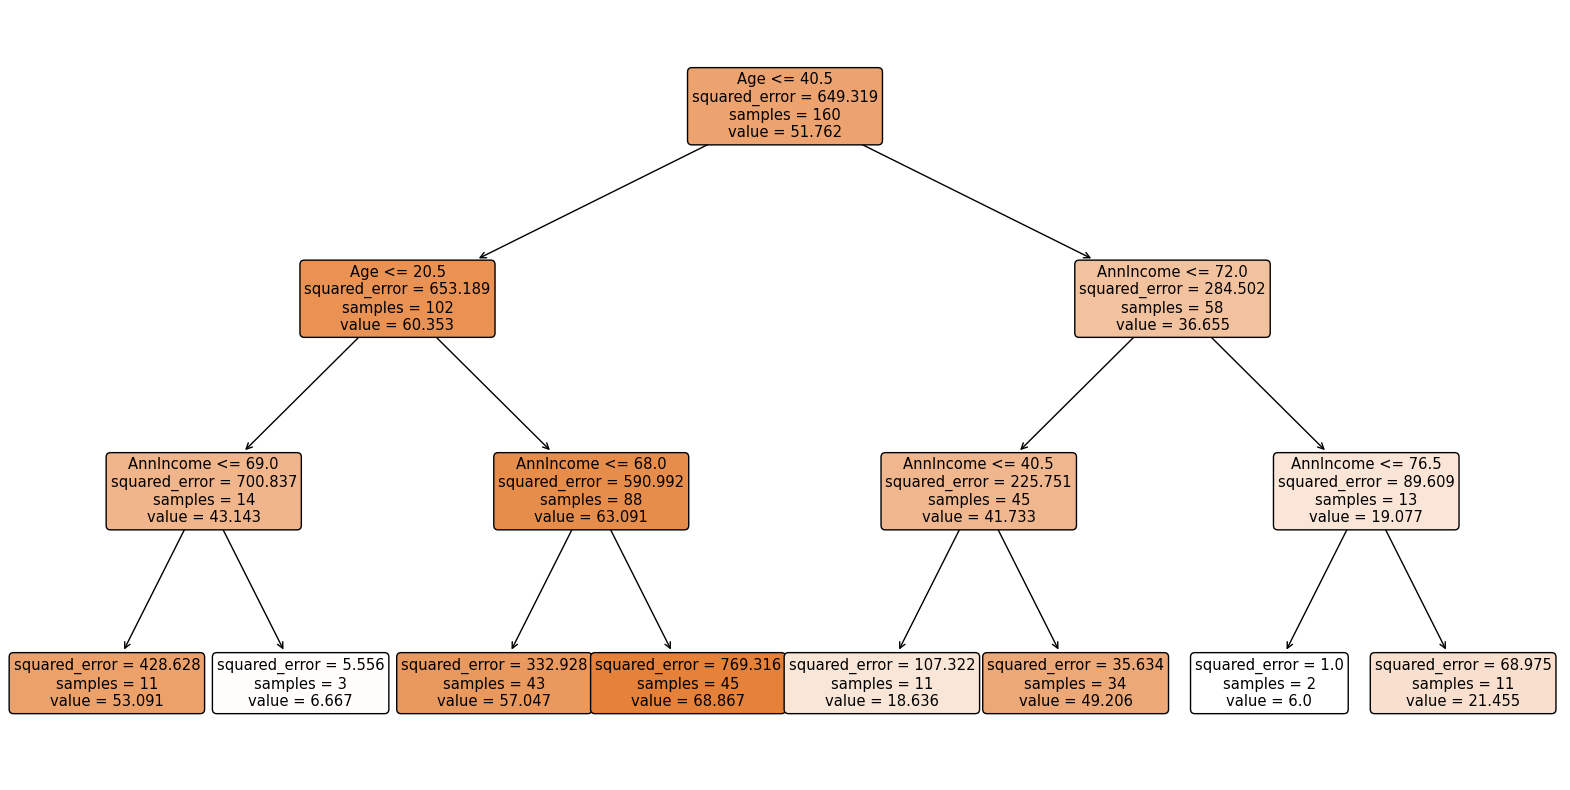

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Create a new instance of DecisionTreeRegressor and fit it to the training data
regressor = DecisionTreeRegressor(min_samples_split=3, max_depth=3)
regressor.fit(X_train,y_train)

# Visualize the decision tree using matplotlib
plt.figure(figsize=(20,10))
plot_tree(regressor,filled=True,rounded=True,feature_names=['Gender','Age','AnnIncome'])
plt.show()


Testing

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 630.50
